In [1]:
# Calculate River Flux

In [78]:
import arrow
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import xarray as xr

In [113]:
year = 2018
basedir = '/results/forcing/rivers/'
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
area = (meshmask.e1t[0] * meshmask.e2t[0]).values

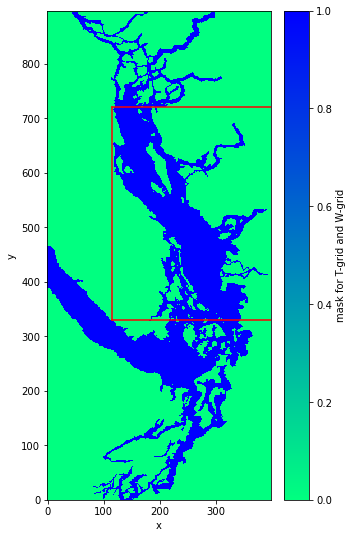

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
meshmask.tmask[0, 0].plot(ax=ax, cmap='winter_r')
imin, imax = 330, 720
jmin, jmax = 115, 398

ax.plot([jmin, 398], [720, 720], 'r')
ax.plot([jmin, jmin], [720, 330], 'r')
ax.plot([jmin, 398], [330, 330], 'r');

In [115]:
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 12, 31)
timerange = arrow.Arrow.range('day', start, endtime)
times = []
rorunoff = []
for i, day in enumerate(timerange):
    ymd = day.format('YYYYMMDD')
    filename = f'R201702DFraCElse_y{day.year}m{day.month:02}d{day.day:02}.nc'
    fullfile = os.path.join(basedir, filename)
    runds = xr.open_dataset(fullfile)
    rorunoff.append(((runds.rorunoff[0, imin:imax, jmin:jmax].values * area[imin:imax, jmin:jmax]).sum()/1000.))
    times.append(day.datetime)
    runds.close()
    if i % 10 == 0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


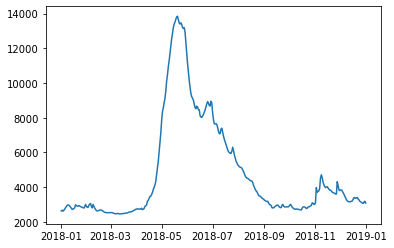

In [116]:
plt.plot(times, rorunoff);

print (rorunoff)

In [117]:
print(np.array(rorunoff).mean())

4726.770248220624


In [118]:
d = {'datetime': times, 'rorunoff': rorunoff}

df = pd.DataFrame(data=d)
df = df.set_index('datetime')

In [119]:
df

,rorunoff
datetime,
2018-01-01 00:00:00+00:00,2633.043935
2018-01-02 00:00:00+00:00,2672.535286
2018-01-03 00:00:00+00:00,2611.979223
2018-01-04 00:00:00+00:00,2661.765216
2018-01-05 00:00:00+00:00,2719.504030
...,...
2018-12-27 00:00:00+00:00,3089.507906
2018-12-28 00:00:00+00:00,3055.979141
2018-12-29 00:00:00+00:00,3136.494262


In [120]:
df.to_csv(f'SoG_runoff_{year}.csv')

In [128]:
ssh2015 = pd.read_csv('SoG_runoff_2015.csv', parse_dates=True, index_col=0)
ssh2016 = pd.read_csv('SoG_runoff_2016.csv', parse_dates=True, index_col=0)
ssh2017 = pd.read_csv('SoG_runoff_2017.csv', parse_dates=True, index_col=0)
ssh2018 = pd.read_csv('SoG_runoff_2018.csv', parse_dates=True, index_col=0)
ssh = pd.concat([ssh2015, ssh2016, ssh2017, ssh2018])

<AxesSubplot:xlabel='datetime'>

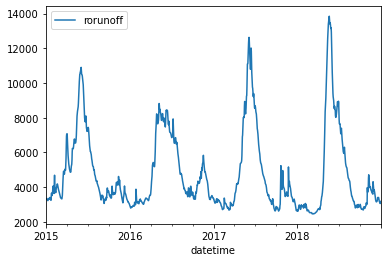

In [131]:
ssh.plot()

In [132]:
ssh.to_csv('SoG_runoff.csv')

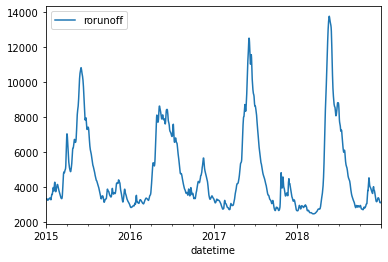

In [134]:
low_pass_ssh = ssh.rolling(4, center=True).mean()
low_pass_ssh.to_csv('low_pass_SoG_runoff.csv')
low_pass_ssh.plot();